<a href="https://colab.research.google.com/github/ravigupta0210/OIBSIP/blob/main/Task_05__Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 05


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Mount the Drive ,,,, so we use Dataset which we upload in google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import dataset which we downloaded from kaggle

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Advertising.csv')

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


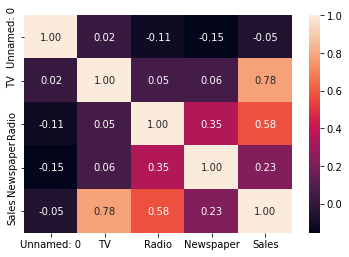

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt="0.2f")

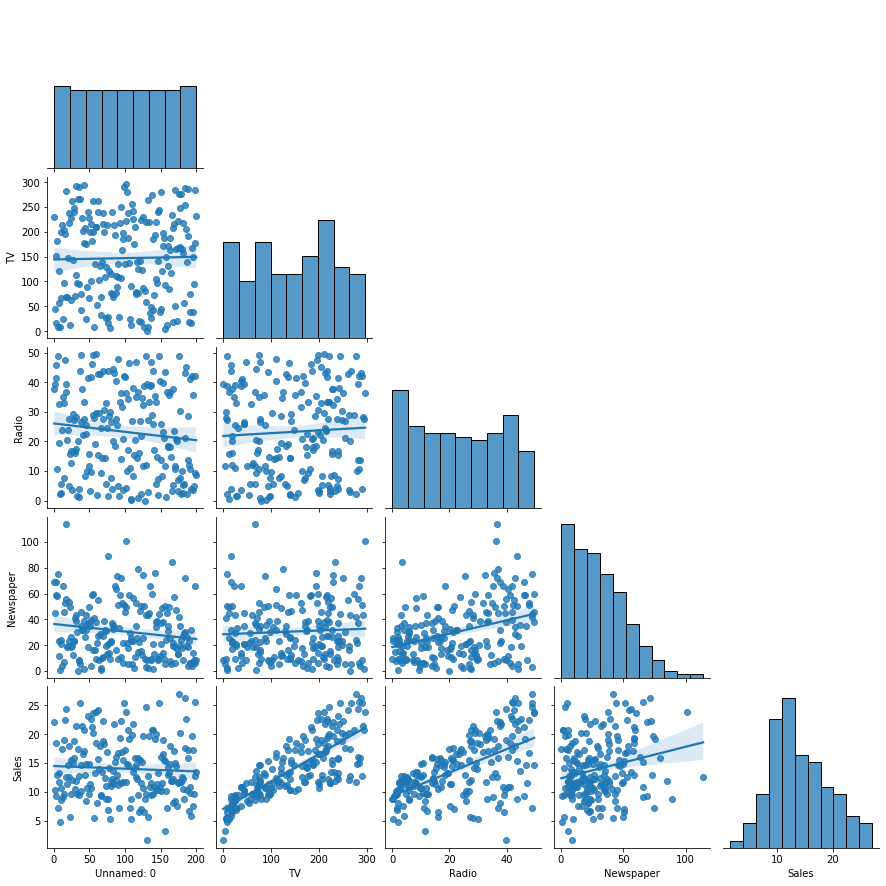

In [ ]:
sns.pairplot(df, kind="reg",corner=True, );

In [ ]:
## Seperate data into features and labels , so we are ready to train and test the model

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#Split data for training and testing

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=45)
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

Shape of X_train (160, 4)
Shape of y_train (160,)


In [ ]:
#create the linear regression

In [ ]:
mul_reg= LinearRegression()

In [ ]:
#training the model

In [ ]:
mul_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# testing data

In [ ]:
pred = mul_reg.predict(X_test)

In [ ]:
#predicted sales

In [ ]:
compare= pd.DataFrame({"y_test":list(y_test), "pred":list(pred)})
compare.head()

,y_test,pred
0,14.9,15.304751
1,8.8,10.248574
2,16.6,16.568926
3,23.8,21.879357
4,12.0,16.076553


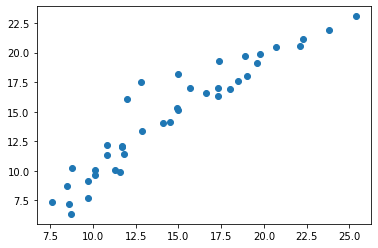

In [ ]:
plt.scatter(y_test, pred)

In [ ]:
#Model evaluation

In [ ]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, pred)
print("Mean Absolute error:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, pred)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, pred)
print("R2 Score:{}".format(R2))

Mean Absolute error:1.1040320936385324
Mean Squared error: 1.5310657747434837
R2 Score:0.8915316806090341
